## PROJECT : The Impact Of E-finance Research On The Present Day E-finance Services

## Introduction

In this project we will be analysing and drawing conclusions on a dataset gathered from a research project on [Kaggle](https://www.kaggle.com/datasets/saurabhshahane/efinance-research-dataset-19812019). We will be answering questions about how research has affected E-finance services and finding trends that can aid development in the E-finance industry.

### Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from skimpy import skim
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import warnings; warnings.simplefilter('ignore')

### Data Wrangling

In [2]:
#let's inspect our data
df=pd.read_csv('e-finance dataset.csv')
#pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
df.head()

,Authors,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,Page end,...,ISBN,CODEN,PubMed ID,Language of Original Document,Abbreviated Source Title,Document Type,Publication Stage,Access Type,Source,EID
0,"Beni E.H., Lagaisse B., Joosen W., Aly A., Bra...",57189258279;8933999000;22834655700;55841871100...,Datablinder: A distributed data protection mid...,2019,Middleware Industry 2019 - Proceedings of the ...,NaN,NaN,NaN,50,57.0,...,9781450370417,NaN,NaN,English,Middlew. Ind. - Proc. Int. Middlew. Conf. Ind....,Conference Paper,Final,Open Access,Scopus,2-s2.0-85078939286
1,"Xiong H., Zhou Y.",57212174318;57212168803;,Construction and Application of Ocean Shipping...,2019,Journal of Coastal Research,97,sp1,NaN,29,34.0,...,NaN,JCRSE,NaN,English,J. Coast. Res.,Article,Final,NaN,Scopus,2-s2.0-85076117139
2,"Feng L., Zhang H., Tsai W.-T., Sun S.",57194783804;56979549200;57050382000;57197771738;,System architecture for high-performance permi...,2019,Frontiers of Computer Science,13,6,NaN,1151,1165.0,...,NaN,NaN,NaN,English,Front. Comput. Sci.,Article,Final,NaN,Scopus,2-s2.0-85051801026
3,"Rožkalne Z., Mukāns M., Vētra A.",57211844555;56074676500;6506045608;,Transition-age young adults with cerebral pals...,2019,Medicina (Lithuania),55,11,737,NaN,NaN,...,NaN,NaN,31739609.0,English,Medicina,Article,Final,Open Access,Scopus,2-s2.0-85075115419
4,"Alshubiri F., Jamil S.A., Elheddad M.",56539905200;56770916900;57195032630;,The impact of ICT on financial development: Em...,2019,International Journal of Engineering Business ...,11,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,English,Intern. J. Eng. Bus. Manage.,Article,Final,Open Access,Scopus,2-s2.0-85071721834


In [3]:
# let's check for columns with null values and data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 46 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Authors                        228 non-null    object 
 1   Author(s) ID                   228 non-null    object 
 2   Title                          228 non-null    object 
 3   Year                           228 non-null    int64  
 4   Source title                   227 non-null    object 
 5   Volume                         180 non-null    object 
 6   Issue                          147 non-null    object 
 7   Art. No.                       27 non-null     object 
 8   Page start                     206 non-null    object 
 9   Page end                       199 non-null    float64
 10  Page count                     4 non-null      float64
 11  Cited by                       153 non-null    float64
 12  DOI                            174 non-null    obj

In [4]:
#let's get a summary statistics of our data
df.describe()

,Year,Page end,Page count,Cited by,Molecular Sequence Numbers,Chemicals/CAS,Tradenames,Manufacturers,Conference code,PubMed ID
count,228.000000,199.000000,4.000000,153.000000,0.0,0.0,0.0,0.0,62.000000,4.000000e+00
mean,2010.214912,723.462312,69.750000,9.294118,NaN,NaN,NaN,NaN,99295.548387,2.013451e+07
std,6.172437,5156.031031,115.508658,14.032801,NaN,NaN,NaN,NaN,33891.037731,9.310620e+06
min,1981.000000,3.000000,10.000000,1.000000,NaN,NaN,NaN,NaN,6372.000000,1.030222e+07
25%,2007.000000,100.500000,12.250000,2.000000,NaN,NaN,NaN,NaN,84516.750000,1.424886e+07
50%,2011.000000,206.000000,13.000000,4.000000,NaN,NaN,NaN,NaN,92701.500000,1.924810e+07
75%,2014.000000,416.000000,70.500000,10.000000,NaN,NaN,NaN,NaN,109673.250000,2.513375e+07
max,2019.000000,72560.000000,243.000000,86.000000,NaN,NaN,NaN,NaN,227949.000000,3.173961e+07


In [5]:
#let's check for duplicated rows

df.duplicated().sum()


0

In [6]:
#let's check for unique columns
df.columns.unique()

Index(['Authors', 'Author(s) ID', 'Title', 'Year', 'Source title', 'Volume',
       'Issue', 'Art. No.', 'Page start', 'Page end', 'Page count', 'Cited by',
       'DOI', 'Link', 'Affiliations', 'Authors with affiliations', 'Abstract',
       'Author Keywords', 'Index Keywords', 'Molecular Sequence Numbers',
       'Chemicals/CAS', 'Tradenames', 'Manufacturers', 'Funding Details',
       'Funding Text 1', 'Funding Text 2', 'References',
       'Correspondence Address', 'Editors', 'Sponsors', 'Publisher',
       'Conference name', 'Conference date', 'Conference location',
       'Conference code', 'ISSN', 'ISBN', 'CODEN', 'PubMed ID',
       'Language of Original Document', 'Abbreviated Source Title',
       'Document Type', 'Publication Stage', 'Access Type', 'Source', 'EID'],
      dtype='object')

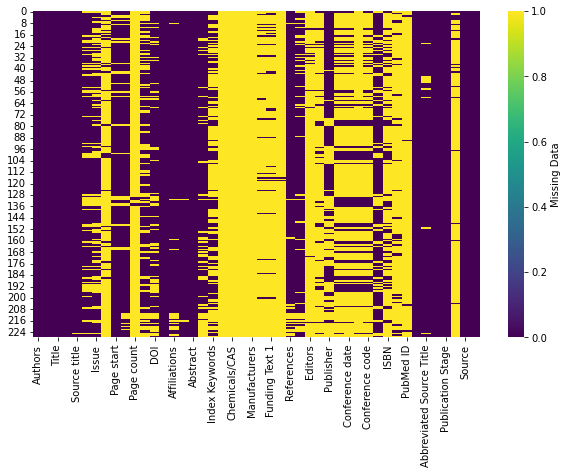

In [7]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna(),
            cmap="viridis",
            cbar_kws={'label': 'Missing Data'})
plt.savefig("visualizing_missing_data_with_heatmap_Seaborn_Python.png", dpi=100)

<Figure size 720x432 with 0 Axes>

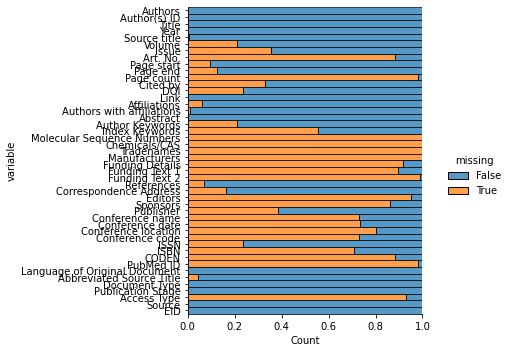

In [8]:
plt.figure(figsize=(10,6))
sns.displot(
    data=df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=100)

In [9]:
# let's drop columns that will not be used in our analysis

cols=['Author(s) ID','Volume','Issue','Art. No.','Page start','Page end','Page count','DOI','Molecular Sequence Numbers','Chemicals/CAS','Tradenames','Manufacturers','Funding Details','Funding Text 1','Funding Text 2','Correspondence Address','Editors','Sponsors','Conference name','Conference date','Conference location','Conference code','ISBN','ISSN','CODEN','PubMed ID','Publication Stage','Access Type','Source','EID']
efinance_df=df.drop(cols,axis=1)

efinance_df.columns

Index(['Authors', 'Title', 'Year', 'Source title', 'Cited by', 'Link',
       'Affiliations', 'Authors with affiliations', 'Abstract',
       'Author Keywords', 'Index Keywords', 'References', 'Publisher',
       'Language of Original Document', 'Abbreviated Source Title',
       'Document Type'],
      dtype='object')

In [10]:
# #let's rename our columns to have the same naming format
efinance_df=efinance_df.rename(columns=lambda x: x.strip().lower().replace(" ","_"))
efinance_df.columns

Index(['authors', 'title', 'year', 'source_title', 'cited_by', 'link',
       'affiliations', 'authors_with_affiliations', 'abstract',
       'author_keywords', 'index_keywords', 'references', 'publisher',
       'language_of_original_document', 'abbreviated_source_title',
       'document_type'],
      dtype='object')

In [11]:
#let's fill our our missing column
efinance_df['cited_by']=efinance_df['cited_by'].fillna(0)

In [12]:
#let's fill other descriptive columns with nulls
efinance_df=efinance_df.fillna('Not Provided')


In [13]:
intcols=[ 'year','cited_by']
strcols=['authors', 'title', 'source_title', 'link',
       'affiliations', 'authors_with_affiliations', 'abstract',
       'author_keywords', 'index_keywords', 'references', 'publisher',
       'language_of_original_document', 'abbreviated_source_title',
       'document_type']

In [14]:
#lets convert 'cited by' column to int (whole numbers)
efinance_df[intcols] = efinance_df[intcols].astype('int64')
efinance_df[strcols] = efinance_df[strcols].astype('str')
efinance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   authors                        228 non-null    object
 1   title                          228 non-null    object
 2   year                           228 non-null    int64 
 3   source_title                   228 non-null    object
 4   cited_by                       228 non-null    int64 
 5   link                           228 non-null    object
 6   affiliations                   228 non-null    object
 7   authors_with_affiliations      228 non-null    object
 8   abstract                       228 non-null    object
 9   author_keywords                228 non-null    object
 10  index_keywords                 228 non-null    object
 11  references                     228 non-null    object
 12  publisher                      228 non-null    object
 13  langu

In [15]:
efinance_df.head()

,authors,title,year,source_title,cited_by,link,affiliations,authors_with_affiliations,abstract,author_keywords,index_keywords,references,publisher,language_of_original_document,abbreviated_source_title,document_type
0,"Beni E.H., Lagaisse B., Joosen W., Aly A., Bra...",Datablinder: A distributed data protection mid...,2019,Middleware Industry 2019 - Proceedings of the ...,0,https://www.scopus.com/inward/record.uri?eid=2...,"imec-DistriNet, KU Leuven, Belgium; imec-COSIC...","Beni, E.H., imec-DistriNet, KU Leuven, Belgium...",Business application owners want to outsource ...,Data protection; Middleware; Security and privacy,Cryptography; Data privacy; Economic and socia...,"Agrawal, R., Kiernan, J., Srikant, R., Xu, Y.,...","Association for Computing Machinery, Inc",English,Middlew. Ind. - Proc. Int. Middlew. Conf. Ind....,Conference Paper
1,"Xiong H., Zhou Y.",Construction and Application of Ocean Shipping...,2019,Journal of Coastal Research,0,https://www.scopus.com/inward/record.uri?eid=2...,"School of Management, Nanchang University, Nan...","Xiong, H., School of Management, Nanchang Univ...",The existing enterprise performance evaluation...,analytic hierarchy process; Environmental valu...,analytical hierarchy process; industrial enter...,"Boczon, A., Dudzinska, M., Kowalska, A., Effec...",Coastal Education Research Foundation Inc.,English,J. Coast. Res.,Article
2,"Feng L., Zhang H., Tsai W.-T., Sun S.",System architecture for high-performance permi...,2019,Frontiers of Computer Science,2,https://www.scopus.com/inward/record.uri?eid=2...,State Key Laboratory of Software Development E...,"Feng, L., State Key Laboratory of Software Dev...","Blockchain(BC), as an emerging distributed dat...",blockchain; concurrency; consensus algorithm; ...,Blockchain; Boron carbide; Commerce; Internet ...,"Garay, J., Kiayias, A., Leonardos, N., The bit...",Higher Education Press,English,Front. Comput. Sci.,Article
3,"Rožkalne Z., Mukāns M., Vētra A.",Transition-age young adults with cerebral pals...,2019,Medicina (Lithuania),0,https://www.scopus.com/inward/record.uri?eid=2...,"Rehabilitation Clinic, Children’s Clinical Uni...","Rožkalne, Z., Rehabilitation Clinic, Children’...",Background and Objectives: The aim of this stu...,Cerebral palsy; Developmental transition; Disa...,Not Provided,"Mutch, L., Alberman, E., Hagberg, B., Kodama, ...",MDPI AG,English,Medicina,Article
4,"Alshubiri F., Jamil S.A., Elheddad M.",The impact of ICT on financial development: Em...,2019,International Journal of Engineering Business ...,0,https://www.scopus.com/inward/record.uri?eid=2...,"Department of Finance and Economics, College o...","Alshubiri, F., Department of Finance and Econo...",The globalization revolution has led to many c...,E-finance; economic growth; financial developm...,Not Provided,"Sassi, S., Goaied, M., Financial development, ...",SAGE Publications Inc.,English,Intern. J. Eng. Bus. Manage.,Article


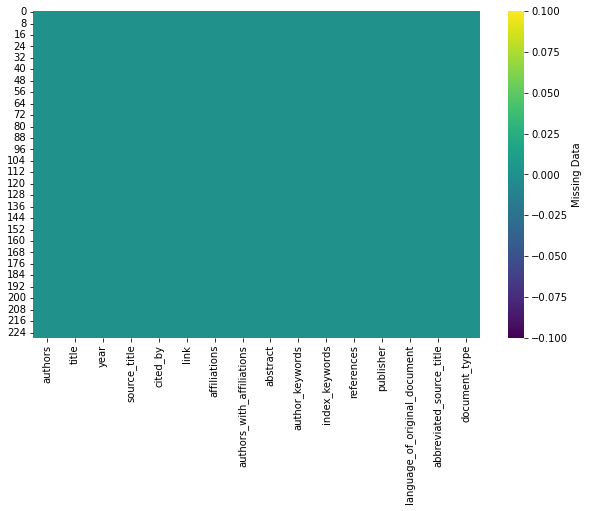

In [16]:
plt.figure(figsize=(10,6))
sns.heatmap(efinance_df.isna(),
            cmap="viridis",
            cbar_kws={'label': 'Missing Data'})
plt.savefig("visualizing_missing_data_with_heatmap_Seaborn_Python.png", dpi=100)

<Figure size 720x432 with 0 Axes>

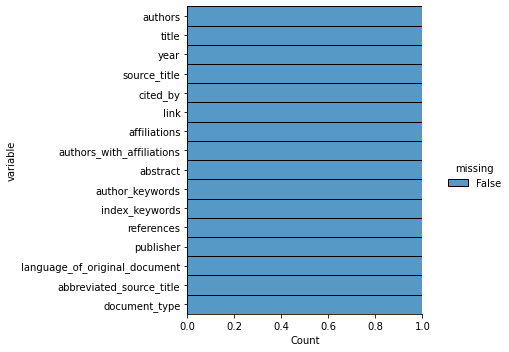

In [17]:
plt.figure(figsize=(10,6))
sns.displot(
    data=efinance_df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=100)

#### From our data above,we dropped columns that will not be needed in our analysis.
#### We renamed our columns to have the same format.
#### We filled missing values with appropriate values.
#### We converted  'cited_by' column from float to int data type

## DATA ANALYSIS AND VISUALIZATION

### Getting detailed summary of the data

In [18]:
skim(efinance_df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 228    │ │ string      │ 14    │                                                          │
│ │ Number of columns │ 16     │ │ int32       │ 2     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━┓  │
│ ┃ column_name        ┃ NA   ┃ NA %    ┃ mean    ┃ sd     ┃ p0      ┃ p25     ┃ p75     ┃ p100    ┃ hist      ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━┩  │
│ │ year               │    0 │       0 │    2000 │    6.2 │    2000 │    2000 │    2000 │    2000 │     ▄█▆   │  │
│ │ cited_by           │    0 │       0 │     6.2 │     12 │       0 │       0 │       6 │      86 │     █     │  │
│ └────────────────────┴──────┴─────────┴─────────┴────────┴─────────┴─────────┴─────────┴─────────┴───────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                           ┃ NA    ┃ NA %      ┃ words per row            ┃ total words         ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ authors                               │     0 │         0 │                        5 │                1100 │  │
│ │ title                                 │     0 │         0 │                        5 │                1100 │  │
│ │ source_title                          │     0 │         0 │                        5 │                1100 │  │
│ │ link                                  │     0 │         0 │                        5 │                1100 │  │
│ │ affiliations                          │     0 │         0 │                        5 │                1100 │  │
│ │ authors_with_affilia                  │     0 │         0 │                        5 │                1100 │  │
│ │ abstract                              │     0 │         0 │                        5 │                1100 │  │
│ │ author_keywords                       │     0 │         0 │                        5 │                1100 │  │
│ │ index_keywords                        │     0 │         0 │                        5 │                1100 │  │
│ │ references                            │     0 │         0 │                        5 │                1100 │  │
│ │ publisher                             │     0 │         0 │                        5 │                1100 │  │
│ │ language_of_original                  │     0 │         0 │                        5 │                1100 │  │
│ │ abbreviated_source_t                  │     0 │         0 │                        5 │                1100 │  │
│ │ document_type                         │     0 │         0 │                        5 │                1100 │  │
│ └───────────────────────────────────────┴───────┴───────────┴──────────────────────────┴─────────────────────┘  │
╰────────────────────────────────────────────────────── 

### What is the most cited document

The maximum number of citations = 86

Getting the document with the highest citations gives⬇⬇

In [19]:
efinance_df.query("cited_by == 86")

,authors,title,year,source_title,cited_by,link,affiliations,authors_with_affiliations,abstract,author_keywords,index_keywords,references,publisher,language_of_original_document,abbreviated_source_title,document_type
139,"Greiner M.E., Wang H.",Building consumer-to-consumer trust in E-finan...,2010,International Journal of Electronic Commerce,86,https://www.scopus.com/inward/record.uri?eid=2...,Department of Information Systems and Quantita...,"Greiner, M.E., Department of Information Syste...","People-to-people (P2P) lending, a specialized ...",E-finance; elaboration likelihood model; on-li...,Not Provided,"Aaronson, D., A note on the benefits of homeow...",Not Provided,English,Int. J. Elect. Commer.,Article


### What is the most cited document type

Grouping the documents by document 

In [20]:
citation = efinance_df.groupby("document_type").agg({"cited_by":"sum"})
citation

,cited_by
document_type,
Article,1030
Book,2
Book Chapter,12
Conference Paper,194
Conference Review,0
Editorial,13
Review,171


In [21]:
citation = citation.sort_values('cited_by', ascending = False).reset_index()
citation

,document_type,cited_by
0,Article,1030
1,Conference Paper,194
2,Review,171
3,Editorial,13
4,Book Chapter,12
5,Book,2
6,Conference Review,0


Representing Number of Documents per citation on a Bar Graph

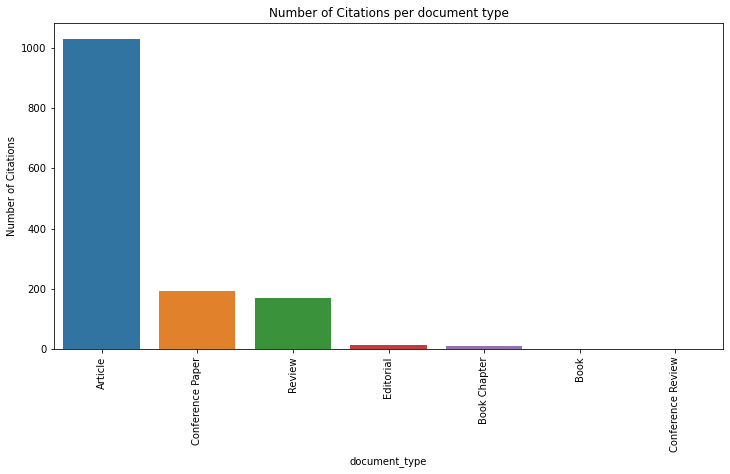

<Figure size 432x288 with 0 Axes>

In [22]:
fig, ax = plt.subplots(figsize= (12,6))
g = sns.barplot(data = citation, x = "document_type", y = "cited_by", ax = ax)
g.set(title = "Number of Citations per document type",
     xlabel = "document_type", 
     ylabel = "Number of Citations")
plt.xticks(rotation = 90)
plt.show()
plt.clf()

Using Line graph to show amount of documents published per year

In [23]:
efinance_df.year.unique()

array([2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009,
       2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 1988, 1986, 1984,
       1981])

In [24]:
year_doc_release = efinance_df.groupby(['year'])['year'].count()

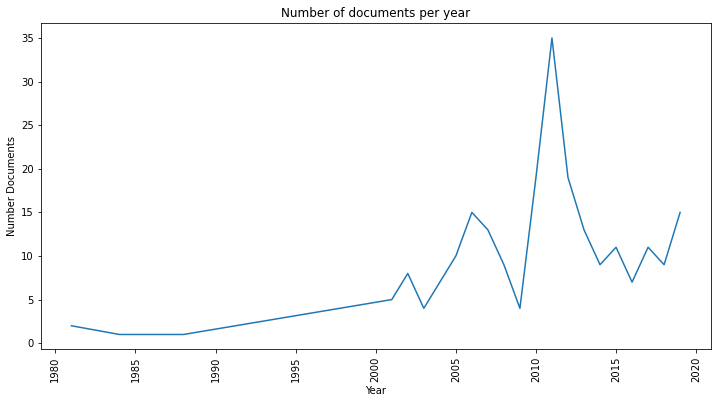

<Figure size 432x288 with 0 Axes>

In [25]:
fig, ax = plt.subplots(figsize= (12,6))
g = sns.lineplot(data = year_doc_release, ax = ax)
g.set(title = "Number of documents per year",
     xlabel = "Year", 
     ylabel = "Number Documents")
plt.xticks(rotation = 90)
plt.show()
plt.clf()

### Manipulating and Extracting keywords from Index, Author and Citation columns to Create Index, Author and Citation respectively.

Index Keyword

In [26]:
efinance_df.index_keywords = efinance_df.index_keywords.str.lower().str.split(";")

In [27]:
for i in range(len(efinance_df["index_keywords"])):
    for j in range(len(efinance_df["index_keywords"][i])):
        efinance_df["index_keywords"][i][j]= efinance_df["index_keywords"][i][j].strip().replace(" ","_")

Author Keyword

In [28]:
efinance_df.author_keywords  = efinance_df.author_keywords .str.lower().str.split(";").replace(" ","_")

In [29]:
for i in range(len(efinance_df["author_keywords"])):
    for j in range(len(efinance_df["author_keywords"][i])):
        efinance_df["author_keywords"][i][j]= efinance_df["author_keywords"][i][j].strip().replace(" ","_")

In [30]:
efinance_df.head(2)

,authors,title,year,source_title,cited_by,link,affiliations,authors_with_affiliations,abstract,author_keywords,index_keywords,references,publisher,language_of_original_document,abbreviated_source_title,document_type
0,"Beni E.H., Lagaisse B., Joosen W., Aly A., Bra...",Datablinder: A distributed data protection mid...,2019,Middleware Industry 2019 - Proceedings of the ...,0,https://www.scopus.com/inward/record.uri?eid=2...,"imec-DistriNet, KU Leuven, Belgium; imec-COSIC...","Beni, E.H., imec-DistriNet, KU Leuven, Belgium...",Business application owners want to outsource ...,"[data_protection, middleware, security_and_pri...","[cryptography, data_privacy, economic_and_soci...","Agrawal, R., Kiernan, J., Srikant, R., Xu, Y.,...","Association for Computing Machinery, Inc",English,Middlew. Ind. - Proc. Int. Middlew. Conf. Ind....,Conference Paper
1,"Xiong H., Zhou Y.",Construction and Application of Ocean Shipping...,2019,Journal of Coastal Research,0,https://www.scopus.com/inward/record.uri?eid=2...,"School of Management, Nanchang University, Nan...","Xiong, H., School of Management, Nanchang Univ...",The existing enterprise performance evaluation...,"[analytic_hierarchy_process, environmental_val...","[analytical_hierarchy_process, industrial_ente...","Boczon, A., Dudzinska, M., Kowalska, A., Effec...",Coastal Education Research Foundation Inc.,English,J. Coast. Res.,Article


### What are the most common author keywords

In [31]:
# Counting the number of times a keywords appears in all the documents
Author_keyword = {}
i = 0
for Keywords in efinance_df["author_keywords"]:
    if type(Keywords) is list:
         if Keywords[0] != "not_provided":
            for keyword in Keywords:
                if keyword in Author_keyword:
                    Author_keyword[keyword] = Author_keyword[keyword] + 1
                else:
                    Author_keyword[keyword] = 1
                
Author_keyword = pd.DataFrame(Author_keyword, index = range(1)).T.sort_values(0, ascending = False)
Author_keyword.columns = ["Number of Documents"]
Author_keyword = pd.DataFrame({'Author_keyword': Author_keyword.index, 'Number of Documents': Author_keyword['Number of Documents']}).reset_index()
Author_keyword = Author_keyword.drop(['index'], axis=1)


In [32]:
Author_keyword

,Author_keyword,Number of Documents
0,e-finance,98
1,electronic_finance,23
2,security,8
3,e-commerce,8
4,e-government,7
...,...,...
777,real_income,1
778,computers,1
779,digital_divide,1
780,digital_inclusion,1


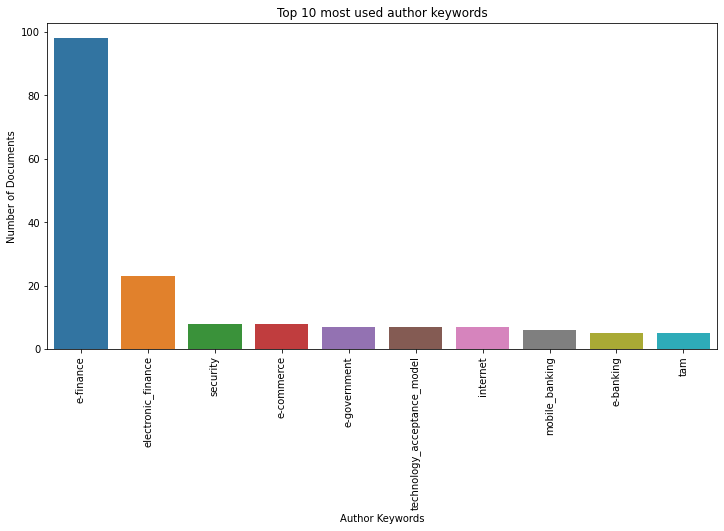

<Figure size 432x288 with 0 Axes>

In [33]:
fig, ax = plt.subplots(figsize= (12,6))
g = sns.barplot(data = Author_keyword.iloc[:10], x = "Author_keyword", y = "Number of Documents", ax = ax)
g.set(title = "Top 10 most used author keywords",
     xlabel = "Author Keywords", 
     ylabel = "Number of Documents")
plt.xticks(rotation = 90)
plt.show()
plt.clf()
#g.xticklabels(labels = list(Author_keyword.iloc[:10].Author_keyword, rotation = 90))

### Extracting and Visualizing THE TOP 10 most commonly used index keywords

In [34]:
# Counting the number of times a keywords appears in all the documents
Index_keyword = {}
i = 0
for Keywords in efinance_df["index_keywords"]:
    if type(Keywords) is list:
         if Keywords[0] != "not_provided":
            for keyword in Keywords:
                if keyword in Index_keyword:
                    Index_keyword[keyword] = Index_keyword[keyword] + 1
                else:
                    Index_keyword[keyword] = 1
                
Index_keyword = pd.DataFrame(Index_keyword, index = range(1)).T.sort_values(0, ascending = False)
Index_keyword.columns = ["Number of Documents"]
Index_keyword = pd.DataFrame({'Index_keyword': Index_keyword.index, 'Number of Documents': Index_keyword['Number of Documents']}).reset_index()
Index_keyword = Index_keyword.drop(['index'], axis=1)


In [35]:
Index_keyword

,Index_keyword,Number of Documents
0,finance,31
1,electronic_commerce,31
2,e_finances,21
3,e-finance,14
4,information_systems,12
...,...,...
913,geography,1
914,gross_national_product,1
915,loan,1
916,policy,1


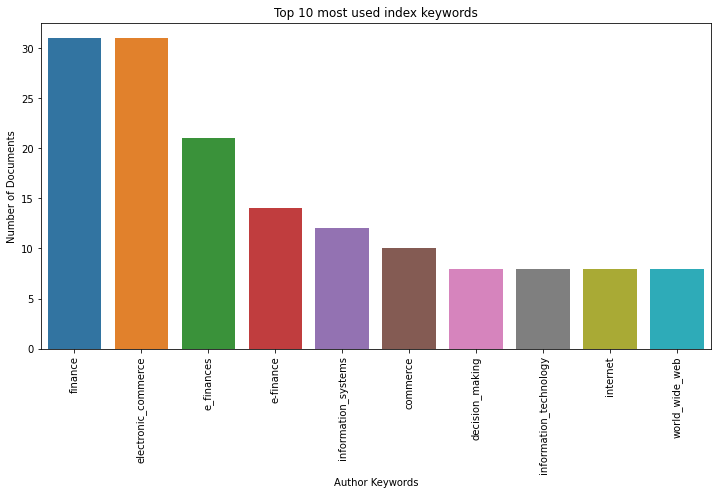

<Figure size 432x288 with 0 Axes>

In [36]:
fig, ax = plt.subplots(figsize= (12,6))
g = sns.barplot(data = Index_keyword.iloc[:10], x = "Index_keyword", y = "Number of Documents", ax = ax)
g.set(title = "Top 10 most used index keywords",
     xlabel = "Author Keywords", 
     ylabel = "Number of Documents")
plt.xticks(rotation = 90)
plt.show()
plt.clf()

### Extracting and Visualizing TOP 10 Most Cited Keywords From Citation Keywords

In [37]:
# Summing the nuber of times documnets containing a particular key word were cited
def Number_of_citations(attribute):
    Author_keyword = {}
    i = 0
    for Keywords in efinance_df[attribute]:
        if type(Keywords) is list:
            if Keywords[0] != "not_provided":
                for keyword in Keywords:
                    if keyword in Author_keyword:
                        Author_keyword[keyword] = Author_keyword[keyword] + 1
                    else:
                        Author_keyword[keyword] = 1


    keyword_citation = {}
    for Keyword in list(Author_keyword):
        i = 0
        keyword_citation[Keyword] = 0
        for Keywords in efinance_df[attribute]:
            if type(Keywords) is list:
                if Keyword in Keywords:
                    keyword_citation[Keyword] = keyword_citation[Keyword] + efinance_df.iloc[i,4]
            i +=1

    keyword_citation = pd.DataFrame(keyword_citation, index=["0"])
    keyword_citation = keyword_citation.T
    keyword_citation.columns = ["Number of Citations"]
    keyword_citation = keyword_citation.sort_values("Number of Citations", ascending = False)
    keyword_citation = pd.DataFrame({'Keyword': keyword_citation.index, 'Number of Documents': keyword_citation['Number of Citations']}).reset_index()
    keyword_citation = keyword_citation.drop(['index'], axis=1)

    return keyword_citation

In [38]:
most_cited_keyword = Number_of_citations("author_keywords")
most_cited_keyword.rename(columns={"Number of Documents":"Number of Citations"}, inplace= True)
most_cited_keyword

,Keyword,Number of Citations
0,e-finance,658
1,electronic_finance,138
2,internet,128
3,trust,114
4,security,105
...,...,...
777,private_investor,0
778,online_broker,0
779,exchange,0
780,alternative_trading_systems,0


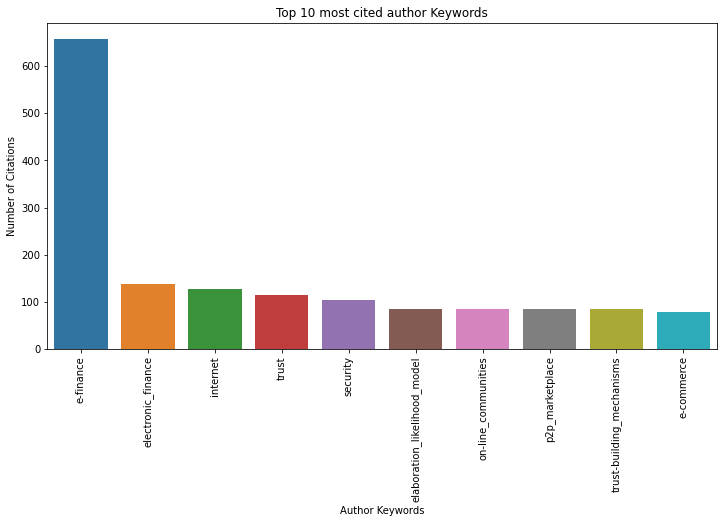

<Figure size 432x288 with 0 Axes>

In [39]:
fig, ax = plt.subplots(figsize= (12,6))
g = sns.barplot(data = most_cited_keyword.iloc[:10], x = "Keyword", y = "Number of Citations", ax = ax)
g.set(title = "Top 10 most cited author Keywords",
     xlabel = "Author Keywords", 
     ylabel = "Number of Citations")
plt.xticks(rotation = 90)
plt.show()
plt.clf()

### Extracting and Visualizing TOP 10 Most Cited Index Keywords From Citation Keywords

In [40]:
Most_cited_indexword = Number_of_citations("index_keywords")
Most_cited_indexword.rename(columns={"Number of Documents":"Number of Citations"}, inplace= True)
Most_cited_indexword

,Keyword,Number of Citations
0,electronic_commerce,154
1,intelligent_agents,104
2,information_systems,102
3,decision_making,97
4,commerce,95
...,...,...
913,network_technologies,0
914,information_safety,0
915,financial_risks,0
916,commercial_services,0


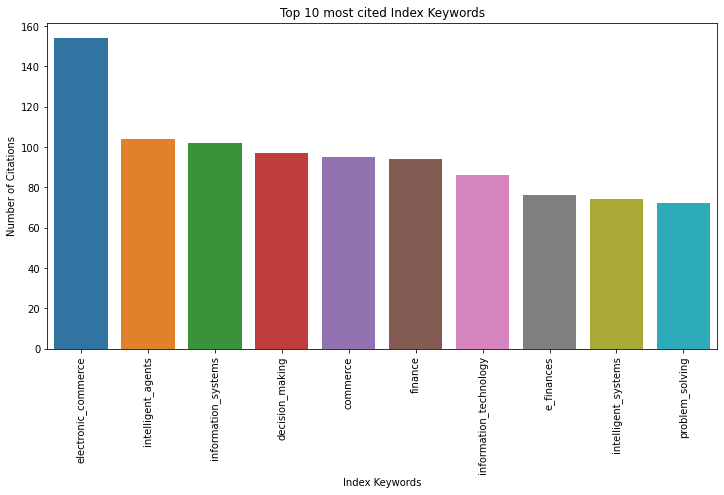

<Figure size 432x288 with 0 Axes>

In [41]:
fig, ax = plt.subplots(figsize= (12,6))
g = sns.barplot(data = Most_cited_indexword.iloc[:10], x = "Keyword", y = "Number of Citations", ax = ax)
g.set(title = "Top 10 most cited Index Keywords",
     xlabel = "Index Keywords", 
     ylabel = "Number of Citations")
plt.xticks(rotation = 90)
plt.show()
plt.clf()

### Getting and Visualizing Language of Documents in Horizontal Bar Graph

In [42]:
language_of_original_document = efinance_df.groupby(['language_of_original_document'])['language_of_original_document'].count()

In [43]:
language_of_original_document

language_of_original_document
Chinese      2
English    223
German       2
Polish       1
Name: language_of_original_document, dtype: int64

<AxesSubplot:title={'center':'Language of Document'}>

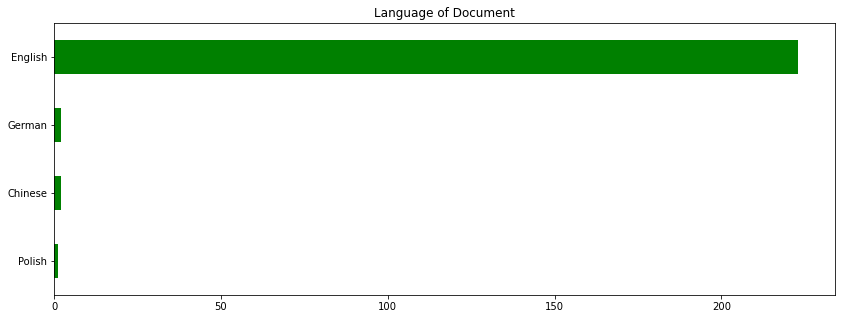

In [44]:
plt.figure(figsize = (14,5))
plt.title('Language of Document')
efinance_df.language_of_original_document.value_counts().sort_values().plot.barh(color = 'green')

### Create a Wordcloud For Index Keyword

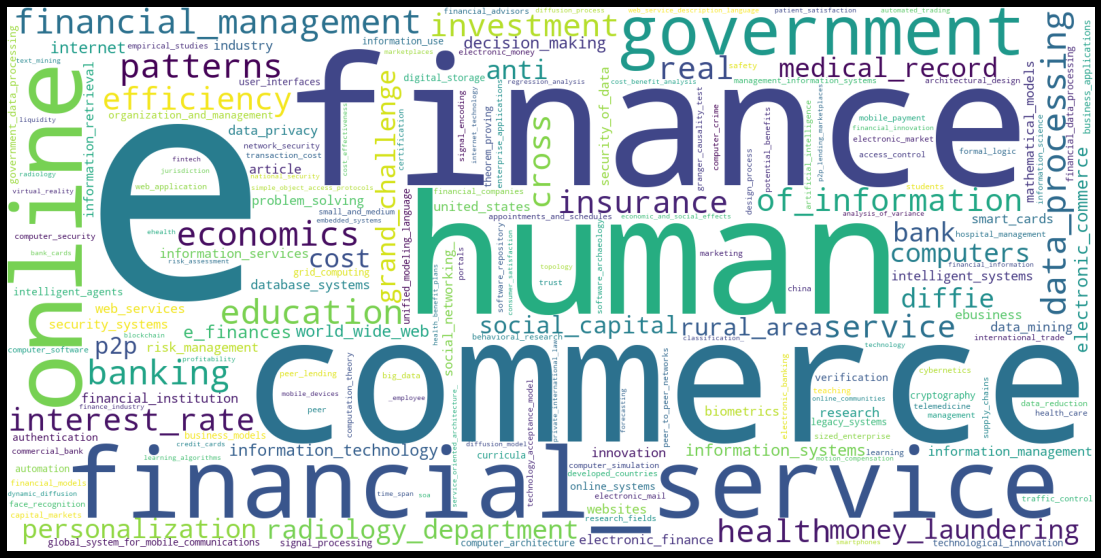

In [45]:
# Start with index Keyword:
Index_text = " ".join(review for review in Index_keyword.Index_keyword)

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="white", width=1600, height=800).generate(Index_text)
# Display the generated image:
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig('wordcloud.png', facecolor='k', bbox_inches='tight')

### Create a Wordcloud For Author Keyword

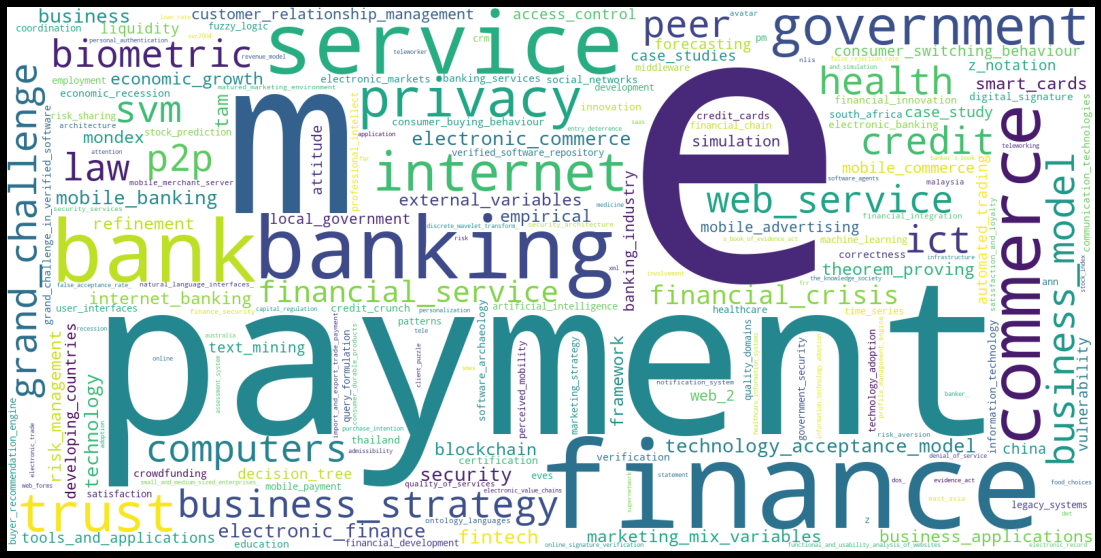

In [46]:
Author_text = " ".join(review for review in Author_keyword.Author_keyword)

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="white", width=1600, height=800).generate(Author_text)
# Display the generated image:
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig('wordcloud.png', facecolor='k', bbox_inches='tight')

### Create a Wordcloud For Citation Keyword

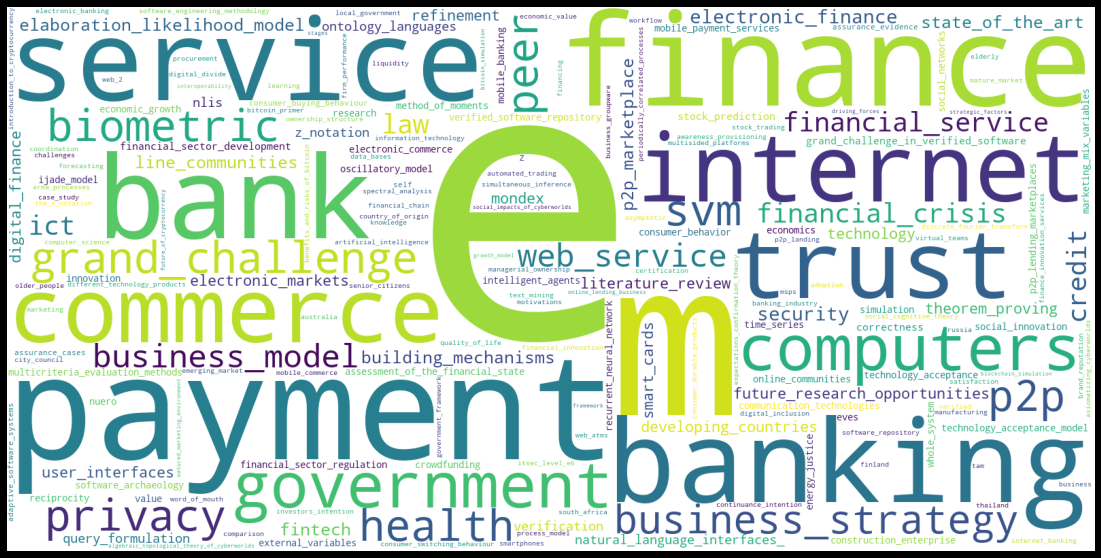

In [47]:
citation_text = " ".join(review for review in most_cited_keyword.Keyword)

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="white", width=1600, height=800).generate(citation_text)
# Display the generated image:
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig('wordcloud.png', facecolor='k', bbox_inches='tight')